In [4]:
from Crypto.Cipher import AES,ChaCha20,DES,DES3
from rsa123 import encrypt_rsa,decrypt_rsa,generate_rsa_keys
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import Aes
import Chacha
import timeit
import matplotlib.pyplot as plt
import hmac
import hashlib

In [5]:
def encrypt_AES(key, plaintext):
    cipher = AES.new(key, AES.MODE_ECB)
    return cipher.encrypt(pad(plaintext, AES.block_size))

def decrypt_AES(key, ciphertext):
    cipher = AES.new(key, AES.MODE_ECB)
    return unpad(cipher.decrypt(ciphertext), AES.block_size)

In [6]:
def encrypt_chacha20(key, msg, nonce):
    cipher = ChaCha20.new(key=key, nonce=nonce)
    ciphertext = cipher.encrypt(msg)
    return ciphertext

def decrypt_chacha20(key, ciphertext, nonce):
    cipher = ChaCha20.new(key=key, nonce=nonce)
    decrypted = cipher.decrypt(ciphertext)
    return decrypted

In [7]:
def encrypt_DES(key, plaintext):
    cipher = DES.new(key, DES.MODE_ECB)
    return cipher.encrypt(pad(plaintext, DES.block_size))

def decrypt_DES(key, ciphertext):
    cipher = DES.new(key, DES.MODE_ECB)
    return unpad(cipher.decrypt(ciphertext), DES.block_size)

In [8]:
def encrypt_DES3(key, plaintext):
    cipher = DES3.new(key, DES3.MODE_ECB)
    return cipher.encrypt(pad(plaintext, DES3.block_size))

def decrypt_DES3(key, ciphertext):
    cipher = DES3.new(key, DES3.MODE_ECB)
    return unpad(cipher.decrypt(ciphertext), DES3.block_size)

In [9]:
def generate_hmac_sha256(key, data):
    return hmac.new(key, data, hashlib.sha256).digest()


def encrypt_chamac(key, msg, nonce):
    cipher = Chacha.chacha20_encrypt(msg, key, nonce)
    hmac_digest = generate_hmac_sha256(key, cipher)
    return hmac_digest, cipher

def decrypt_chamac(key, hmac_digest, cipher, nonce):
    if hmac_digest != generate_hmac_sha256(key, cipher):
        return "HMAC mismatch. Data is tampered"
    return Chacha.chacha20_decrypt(cipher, key, nonce)


### Inbuilt Implementation

In [10]:
msg = 0x3243f6a8885a308d313198a2e0370734
key = get_random_bytes(32)
key1 = get_random_bytes(8)
key2 = get_random_bytes(24)
msg = msg.to_bytes(16, byteorder='big')
nonce = get_random_bytes(8)

print("AES")
print("Plaintext:", msg.hex())
ciphertext = encrypt_AES(key, msg)
print("Ciphertext:", ciphertext.hex())
decrypted = decrypt_AES(key, ciphertext)
print("Decrypted:", decrypted.hex())
encryption_time = timeit.timeit(lambda: encrypt_AES(key, msg), number=1000)
print("Encryption time:", encryption_time)
decryption_time = timeit.timeit(lambda: decrypt_AES(key, ciphertext), number=1000)
print("Decryption time:", decryption_time)

print("\nChaCha20")
print("Plaintext:", msg.hex())
hmac_digest, ciphertext = encrypt_chamac(key, msg, nonce)
print("Ciphertext:", ciphertext.hex())
decrypted = decrypt_chamac(key, hmac_digest, ciphertext, nonce)
print("Decrypted:", decrypted.hex())
encryption_time = timeit.timeit(lambda: encrypt_chamac(key, msg, nonce), number=1000)
print("Encryption time:", encryption_time)
decryption_time = timeit.timeit(lambda: decrypt_chamac(key, hmac_digest, ciphertext, nonce), number=1000)
print("Decryption time:", decryption_time)

print("\nDES")
print("Plaintext:", msg.hex())
ciphertext = encrypt_DES(key1, msg)
print("Ciphertext:", ciphertext.hex())
decrypted = decrypt_DES(key1, ciphertext)
print("Decrypted:", decrypted.hex())
encryption_time = timeit.timeit(lambda: encrypt_DES(key1, msg), number=1000)
print("Encryption time:", encryption_time)
decryption_time = timeit.timeit(lambda: decrypt_DES(key1, ciphertext), number=1000)
print("Decryption time:", decryption_time)

print("\n3DES")
print("Plaintext:", msg.hex())
ciphertext = encrypt_DES3(key2, msg)
print("Ciphertext:", ciphertext.hex())
decrypted = decrypt_DES3(key2, ciphertext)
print("Decrypted:", decrypted.hex())
encryption_time = timeit.timeit(lambda: encrypt_DES3(key2, msg), number=1000)
print("Encryption time:", encryption_time)
decryption_time = timeit.timeit(lambda: decrypt_DES3(key2, ciphertext), number=1000)
print("Decryption time:", decryption_time)

AES
Plaintext: 3243f6a8885a308d313198a2e0370734
Ciphertext: 621ab256948ce6c27f6d6960255736632ad22fbe90922da58a27dae8e0517317
Decrypted: 3243f6a8885a308d313198a2e0370734
Encryption time: 0.021922100000001166
Decryption time: 0.026310299999998676

ChaCha20
Plaintext: 3243f6a8885a308d313198a2e0370734
Ciphertext: 8a6bf8b07f3818be11804734301ea81f
Decrypted: 3243f6a8885a308d313198a2e0370734
Encryption time: 0.3546061999999992
Decryption time: 0.33606080000000027

DES
Plaintext: 3243f6a8885a308d313198a2e0370734
Ciphertext: b07403e9e6d352e19aca4426ef7fe01197a265c8f60b7337
Decrypted: 3243f6a8885a308d313198a2e0370734
Encryption time: 0.04592079999999932
Decryption time: 0.04366770000000031

3DES
Plaintext: 3243f6a8885a308d313198a2e0370734
Ciphertext: ee0d504d81cc4f88e3a5b63a8f026bb7d90c25a7b581e09b
Decrypted: 3243f6a8885a308d313198a2e0370734
Encryption time: 0.16277509999999928
Decryption time: 0.10773679999999963


### Scratch Implementation

In [11]:
msg = get_random_bytes(16)
key = get_random_bytes(32)
nonce = get_random_bytes(8)

print("AES")
print("Plaintext:", msg.hex())
aes = Aes.AES(int.from_bytes(key, byteorder='big'))
ciphertext = aes.encrypt(int.from_bytes(msg, byteorder='big'))
print("Ciphertext:", ciphertext.to_bytes(16, byteorder='big').hex())
decrypted = aes.decrypt(ciphertext)
print("Decrypted:", decrypted.to_bytes(16, byteorder='big').hex())
encryption_time = timeit.timeit(lambda: aes.encrypt(int.from_bytes(msg, byteorder='big')), number=1500)
print("Encryption time:", encryption_time)
decryption_time = timeit.timeit(lambda: aes.decrypt(ciphertext), number=1500)
print("Decryption time:", decryption_time)
print("Total time:", encryption_time + decryption_time)

print("\nChaCha20")
print("Plaintext:", msg.hex())
hmac_digest, ciphertext = encrypt_chamac(key, msg, nonce)
print("Ciphertext:", ciphertext.hex())
decrypted = decrypt_chamac(key, hmac_digest, ciphertext, nonce)
print("Decrypted:", decrypted.hex())
encryption_time = timeit.timeit(lambda: encrypt_chamac(key, msg, nonce), number=1000)
print("Encryption time:", encryption_time)
decryption_time = timeit.timeit(lambda: decrypt_chamac(key, hmac_digest, ciphertext, nonce), number=1000)
print("Decryption time:", decryption_time)
print("Total time:", encryption_time + decryption_time)

AES
Plaintext: 3624f1b55634b7fdfe95fb7715398599
Ciphertext: a9b6d2b8c0b1c533fea3d27cdb30289d
Decrypted: 3624f1b55634b7fdfe95fb7715398599
Encryption time: 0.3498816999999974
Decryption time: 0.4054879000000007
Total time: 0.7553695999999981

ChaCha20
Plaintext: 3624f1b55634b7fdfe95fb7715398599
Ciphertext: 216597d45a4fcf33b6d6e840c5ca71d2
Decrypted: 3624f1b55634b7fdfe95fb7715398599
Encryption time: 0.32241630000000043
Decryption time: 0.3469861999999999
Total time: 0.6694025000000003


In [75]:
import random


def calculation():
    msg = get_random_bytes(16)
    key = get_random_bytes(32)
    key1 = get_random_bytes(8)
    key2 = get_random_bytes(24)
    nonce = get_random_bytes(8)
    p, q = generate_rsa_keys(512)
    msg1 = random.randint(1000000, 1000000000)


    aes = Aes.AES(int.from_bytes(key, byteorder='big'))
    ciphertext = aes.encrypt(int.from_bytes(msg, byteorder='big'))
    decrypted = aes.decrypt(ciphertext)
    encryption_time = timeit.timeit(lambda: aes.encrypt(int.from_bytes(msg, byteorder='big')), number=1000)
    decryption_time = timeit.timeit(lambda: aes.decrypt(ciphertext), number=1000)
    x1 = encryption_time + decryption_time

    ciphertext,hmac_digest = encrypt_chamac(key, msg, nonce)
    decrypted = decrypt_chamac(key, hmac_digest, ciphertext, nonce)
    encryption_time = timeit.timeit(lambda: encrypt_chamac(key, msg, nonce), number=1000)
    decryption_time = timeit.timeit(lambda: decrypt_chamac(key, hmac_digest, ciphertext, nonce), number=1000)
    x2 = encryption_time + decryption_time

    ciphertext = encrypt_DES(key1, msg)
    decrypted = decrypt_DES(key1, ciphertext)
    encryption_time = timeit.timeit(lambda: encrypt_DES(key1, msg), number=1000)
    decryption_time = timeit.timeit(lambda: decrypt_DES(key1, ciphertext), number=1000)
    x3 = encryption_time + decryption_time

    ciphertext = encrypt_DES3(key2, msg)
    decrypted = decrypt_DES3(key2, ciphertext)
    encryption_time = timeit.timeit(lambda: encrypt_DES3(key2, msg), number=1000)
    decryption_time = timeit.timeit(lambda: decrypt_DES3(key2, ciphertext), number=1000)
    x4 = encryption_time + decryption_time

    ciphertext = encrypt_rsa(msg1, p)
    decrypted = decrypt_rsa(ciphertext, q)
    encryption_time = timeit.timeit(lambda: encrypt_rsa(msg1, p), number=1000)
    decryption_time = timeit.timeit(lambda: decrypt_rsa(ciphertext, q), number=1000)
    x5 = encryption_time + decryption_time
    
    
    
    return x1,x2,x3,x4,x5

In [76]:
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
for i in range(15):
    x1,x2,x3,x4,x5 = calculation()
    l1.append(x1)
    l2.append(x2)
    l3.append(x3)
    l4.append(x4)
    l5.append(x5)

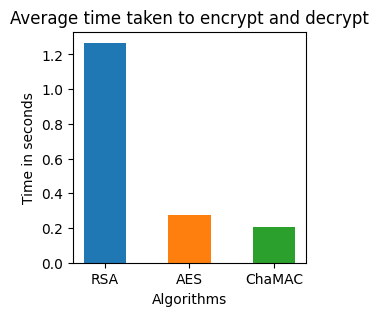

In [79]:
plt.figure(figsize=(3,3))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.bar(['RSA', 'AES', 'ChaMAC'], [sum(l5)/len(l5), sum(l1)/len(l1), sum(l2)/len(l2)], color=colors,width=0.5,align='center')
plt.ylabel('Time in seconds')
plt.xlabel('Algorithms')
plt.title('Average time taken to encrypt and decrypt')
plt.show()

In [24]:
x1,x2,x3,x4,x5 = calculation()
l1 = [x1,x2,x3,x4,x5]
l2 = [0,0,0,0,0]
for i in range(100):
    x1,x2,x3,x4,x5 = calculation()
    l2[0]+=x1
    l2[1]+=x2
    l2[2]+=x3
    l2[3]+=x4
    l2[4]+=x5
l3 = [0,0,0,0,0]
for i in range(200):
    x1,x2,x3,x4,x5 = calculation()
    l3[0]+=x1
    l3[1]+=x2
    l3[2]+=x3
    l3[3]+=x4
    l3[4]+=x5

l4 = [0,0,0,0,0]
for i in range(300):
    x1,x2,x3,x4,x5 = calculation()
    l4[0]+=x1
    l4[1]+=x2
    l4[2]+=x3
    l4[3]+=x4
    l4[4]+=x5

In [25]:
print(l1[4],l1[0],l1[1])
print(l2[4],l2[0],l2[1])
print(l3[4],l3[0],l3[1])
print(l4[4],l4[0],l4[1])

2.180870900000002 0.4816439999999602 0.35067809999992505
136.1637386 31.70869140000042 22.87999480000036
281.87997300000205 63.47288519999972 47.23524450000002
417.85415070000045 96.15933309999843 69.17610640000157


NameError: name 'l1' is not defined

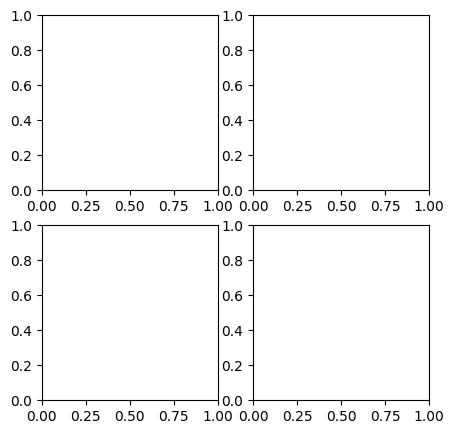

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming l1, l2, l3, l4 are lists containing data for each user count

fig, axs = plt.subplots(2, 2, figsize=(5, 5))

# Define colors for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plotting each bar chart with different colors
def plot_subplot(ax, data, title):
    ax.bar(['RSA', 'AES', 'ChaMAC'], data, width=0.5, align='center', color=colors)
    ax.set_ylabel('Time in seconds')
    ax.set_xlabel('Algorithms')
    ax.set_title(title, fontsize=10)
    min_val = int(min(data))
    max_val = int(max(data))
    ticks = np.arange(min_val, max_val+1, ((max_val-min_val)//4) + 1)  # Equally spaced ticks based on data range
    ax.set_yticks(ticks)

plot_subplot(axs[0, 0], [l1[4], l1[0], l1[1]], '1 USER')
plot_subplot(axs[0, 1], [l2[4], l2[0], l2[1]], '100 USERS')
plot_subplot(axs[1, 0], [l3[4], l3[0], l3[1]], '200 USERS')
plot_subplot(axs[1, 1], [l4[4], l4[0], l4[1]], '300 USERS')

# Main title for all subplots
plt.suptitle('Time taken to encrypt and decrypt for n users', fontsize=12)

plt.tight_layout()
plt.show()
